<a href="https://colab.research.google.com/github/desunny/example/blob/desunny-steel/(forS)Lec07_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC(%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 의사결정트리
  - 농어의 무게를 예측하는 문제 (ex. 연료량에 따른 고로 온도변화 예측)
  

## 데이터 준비하기


In [ ]:
#판다스로 데이터 불러오기
import pandas as pd
df = pd.read_csv("https://bit.ly/perch_csv_data")
perch_full = df.to_numpy()

print(perch_full[:3]) #길이, 높이, 두께 

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]]


In [ ]:
#타겟 데이터 준비 
import numpy as np 
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
#perch_full 과 perch_weight를 훈련 세트와 테스트 세트로 분리 
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(42, 3) (14, 3)


## 의사결정트리 훈련 

### 특성공학 적용하여 훈련
  - 기존의 특성을 사용하여 새로운 특성을 만들어내는 작업

In [ ]:
#싸이킷 런의 변환기를 이용하여 다중 특성 생성 

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False) #싸이킷 런에서는 자동으로 절편을 만들기 때문에 절편을 생성하는 옵션은 False로 처리 
#poly.fit([[2,3]]) #특성 조합을 찾기 
#print(poly.transform([[2,3]])) #특성 조합을 만들기 - 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가함. 2와 3을 각기 제곱한 4, 9가 추가되고. 2와 3을 곱한 6이 추가되었음

poly.fit(train_input) 
train_poly = poly.transform(train_input)
print(train_poly.shape) #42개 행, 9개 특성을 가진 데이터가 생성됨 
print(poly.get_feature_names())


(42, 9)
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


In [ ]:
#테스트 데이터도 다중 특성 데이터 셋으로 변환
test_poly = poly.transform(test_input)
print(test_poly.shape)
print(poly.get_feature_names())


(14, 9)
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


In [ ]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()
dtr.fit(train_poly, train_target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#스코어 R^2
print(dtr.score(train_poly, train_target))
print(dtr.score(test_poly, test_target))

1.0
0.9687916665000257


#### 이미지 그리기 (특성공학)

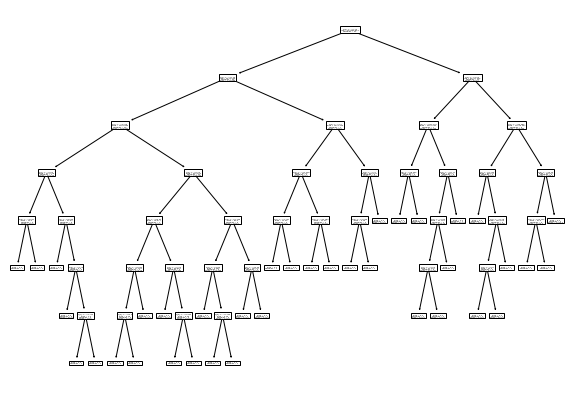

In [ ]:
#이미지 그리기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dtr)
plt.show()

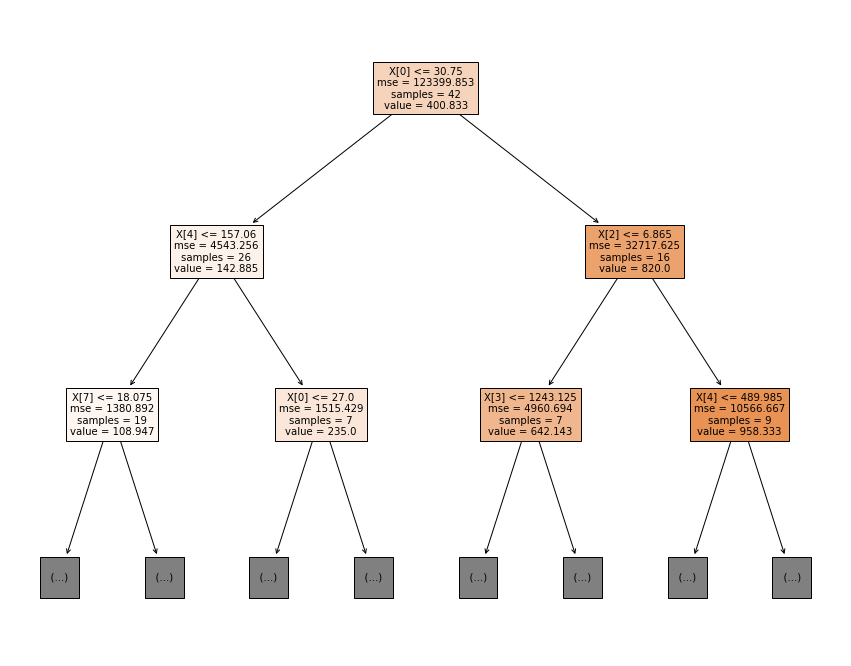

In [ ]:
#이미지 정련
plt.figure(figsize=(15, 12))
plot_tree(dtr, max_depth=2, feature_names=None, filled=True)
plt.show()

#설명할 수 있나? 

### 순 입력데이터로 훈련하기
* 의사결정트리는 사람이 이해할 수 있는 형태의 데이터로 학습함. 이해하기 쉬움 (설명력이 좋음)

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(train_input, train_target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#스코어 R^2
print(dtr.score(train_input, train_target))
print(dtr.score(test_input, test_target))

1.0
0.9455368841560597


#### 이미지 그리기 (순 데이터)

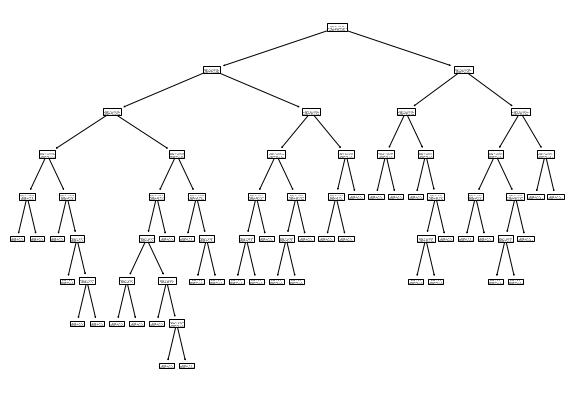

In [ ]:
#이미지 그리기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dtr)
plt.show()

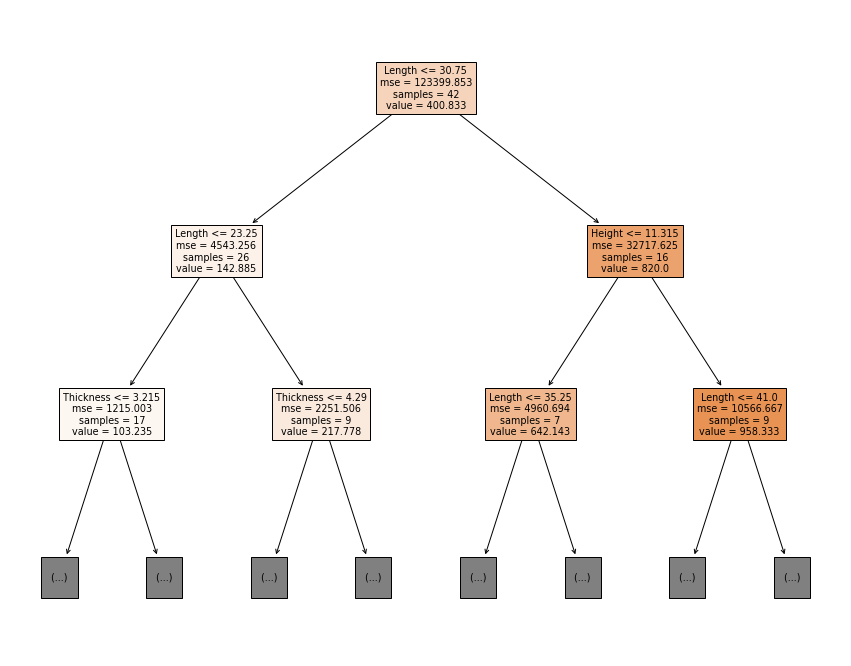

In [ ]:
#이미지 정련
plt.figure(figsize=(15, 12))
plot_tree(dtr, max_depth=2, feature_names=['Length', 'Height', 'Thickness' ], filled=True)
plt.show()

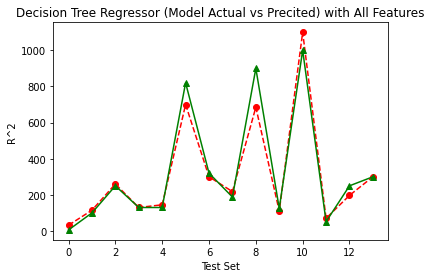

In [ ]:
test_predict = dtr.predict(test_input)
plt.figure()
plt.title("Decision Tree Regressor (Model Actual vs Precited) with All Features")
plt.xlabel('Test Set')
plt.ylabel('R^2')
plt.plot(test_predict, 'ro--', label="Predict") #r: 컬러, o: 도형형태 --: 점선
plt.plot(test_target, '^-', color="g", label="Actual")
plt.show()

### 1.실습문제
 * Length 100, Height 20, Thickness 20 인 농어의 무게를 예측하세요. 

In [ ]:
# 의사결정트리 회귀 모델을 만들고 훈련(학습) 시킵니다.



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

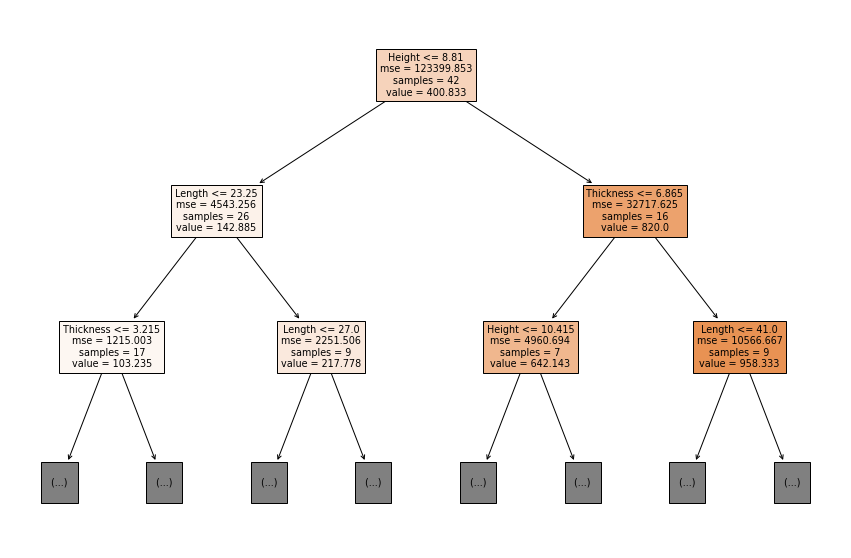

In [ ]:
# Plot Tree를 그립니다. 이때 max_depth는 2으로 지정합니다. feature_names은 'Length', 'Height', 'Thickness'로 합니다. 


In [ ]:
# print(test_input)
# Length 100, Height 20, Thickness 20 농어의 무게를 예측합니다. 


[1100.]


##교차검증

###(Hold out) 검증세트 활용하기
 - 테스트 세트를 검증에 사용할 경우, 테스트 세트 자체를 학습하는 문제가 발생함

  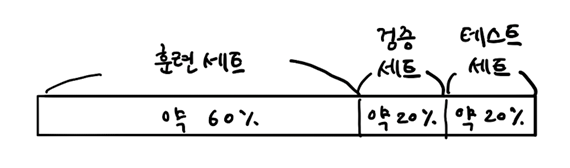

In [ ]:
#perch_full 과 perch_weight를 훈련 세트와 테스트 세트로 분리 
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)

(42, 3) (14, 3)


In [ ]:
#훈련세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

print(train_input.shape, val_input.shape, test_input.shape)


(33, 3) (9, 3) (14, 3)


In [ ]:
#학습하기 
dtr = DecisionTreeRegressor()
dtr.fit(train_input, train_target)
print(dtr.score(train_input, train_target))
print(dtr.score(val_input, val_target))
print(dtr.score(test_input, test_target))

1.0
0.9749104574229915
0.9811150359183027


### K-Fold 교차 검증 
  - 데이터가 많으면 많을 수록 성능이 좋음. 데이터가 부족할 때 성능을 향상시키기 위해서 사용
  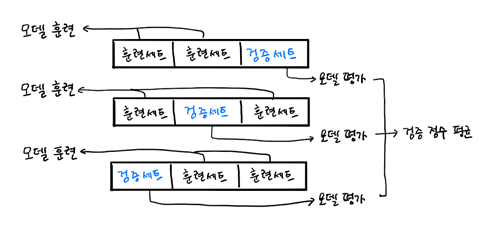

In [ ]:
#perch_full 과 perch_weight를 훈련 세트와 테스트 세트로 분리 
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)

(42, 3) (14, 3)


In [ ]:
from sklearn.model_selection import cross_validate
socres = cross_validate(dtr, train_input, train_target, return_estimator=True) #평가할 모델 객체와 훈련세트 전체를 매개변수로 전달. 내부적으로 데이터를 분할하여 훈련시킴 
print(scores['test_score']) #기본 5-fold 교차검증 수행


[0.95803294 0.98584647 0.94882527 0.94358873 0.80228106]


In [ ]:
import numpy as np
print(round(np.mean(scores['test_score']),2)) #scores의 값을 평균한 값 

0.93


In [ ]:
# best parameter를 가져와서 다시 모델생성 후 학습 
dtr = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
dtr.fit(train_input, train_target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
print(dtr.score(train_input, train_target))
print(dtr.score(val_input, val_target))
print(dtr.score(test_input, test_target))

1.0
1.0
0.9218038836305911


### 2.실습문제
  - K-Fold 교차 검증을 이용하여  Length 100, Height 20, Thickness 20 인 농어의 무게를 예측하세요. 

In [ ]:
# 1.의사결정트리 객체 생성 


# 2.크로스 밸리데이터 객체 생성 


#print(scores['test_score']) #기본 5-fold 교차검증 수행
#print(round(np.mean(scores['test_score']),2)) #scores의 값을 평균한 값 
#print(scores)

# 3.베스트 파라미터로 의사결정트리 생성 후 훈련 

# 4.베스트 파라미터로 의사결정트리 훈련 


# 5.Length 100, Height 20, Thickness 20인 농어 무게 예측 



[0.95803294 0.98584647 0.94882527 0.94358873 0.80228106]


array([1100.])

### 하이퍼 파라미터 튜닝

##### 그리드 서치

In [ ]:
#싸이킷런에서 제공하는 GridSearchCV를 활용. 왜냐하면 독립변수(Feature)의 수가 많을 경우 for loop를 돌면서 구현하는 것이 매우 복잡하기 때문

from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

#n_jobs cpu의 코어 갯수. -1은 가지고 있는 모든 것 사용하기. 왜? 파라미터별 5번씩 층화추출하여 후련하는 모델임. 훈련수가 많아짐 
gs = GridSearchCV(DecisionTreeRegressor(random_state=42), params, n_jobs=-1) 

gs.fit(train_input, train_target)

dtr = gs.best_estimator_ # 최적모델: GridSearch로 찾은 최적의 매개변수 조합으로 훈련된 세트 
print(dtr.score(train_input, train_target))

print(gs.best_estimator_)
print(gs.best_params_) #최적 파라미터 
print(gs.best_score_)


1.0
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0001, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')
{'min_impurity_decrease': 0.0001}
0.9770407980531045


In [ ]:
print(gs.cv_results_['mean_test_score']) #5번 수행한 값의 평균 

best_index = np.argmax(gs.cv_results_['mean_test_score']) #가장 높은 점수를 가진 것의 인덱스 구하기 
print(gs.cv_results_['params'][best_index]) #최적 파라미터 

[0.9770408 0.9770408 0.9770408 0.9770408 0.9770408]
{'min_impurity_decrease': 0.0001}


##### 랜덤서치
  - 매개변수의 값이 수치일 때 범위나 간격을 정하는 기준이 없음 
  - 너무 많은 매개변수가 있을 경우 수행 시간이 오래 걸리는 문제를 보완

In [ ]:
from scipy.stats import uniform, randint #싸이파이 - 적분, 보간, 선형대수, 확률 ㄷㅇ을 포함한 수치 계산 전용 라이브러리

params = {
    'min_impurity_decrease': uniform(0.0001, 0.001), #uniform 실수 랜덤을 뽑을 때 
    'max_depth': randint(20,50), #randint 정수 랜덤을 뽑을 때 
    'min_samples_split': randint(2,25),
    'min_samples_leaf': randint(1,25),
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)

gs.fit(train_input, train_target)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=42,
                                                   splitter='best'),
                   iid='

In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))
print(gs.best_score_)
print(gs.best_params_)

0.9770407980531045
0.9770407980531045
{'max_depth': 47, 'min_impurity_decrease': 0.0004562978380769749, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
dtr = gs.best_estimator_
print(dtr.score(train_input, train_target))
print(dtr.score(val_input, val_target))
print(dtr.score(test_input, test_target))

1.0
0.9412745486216655
0.9493875368050345


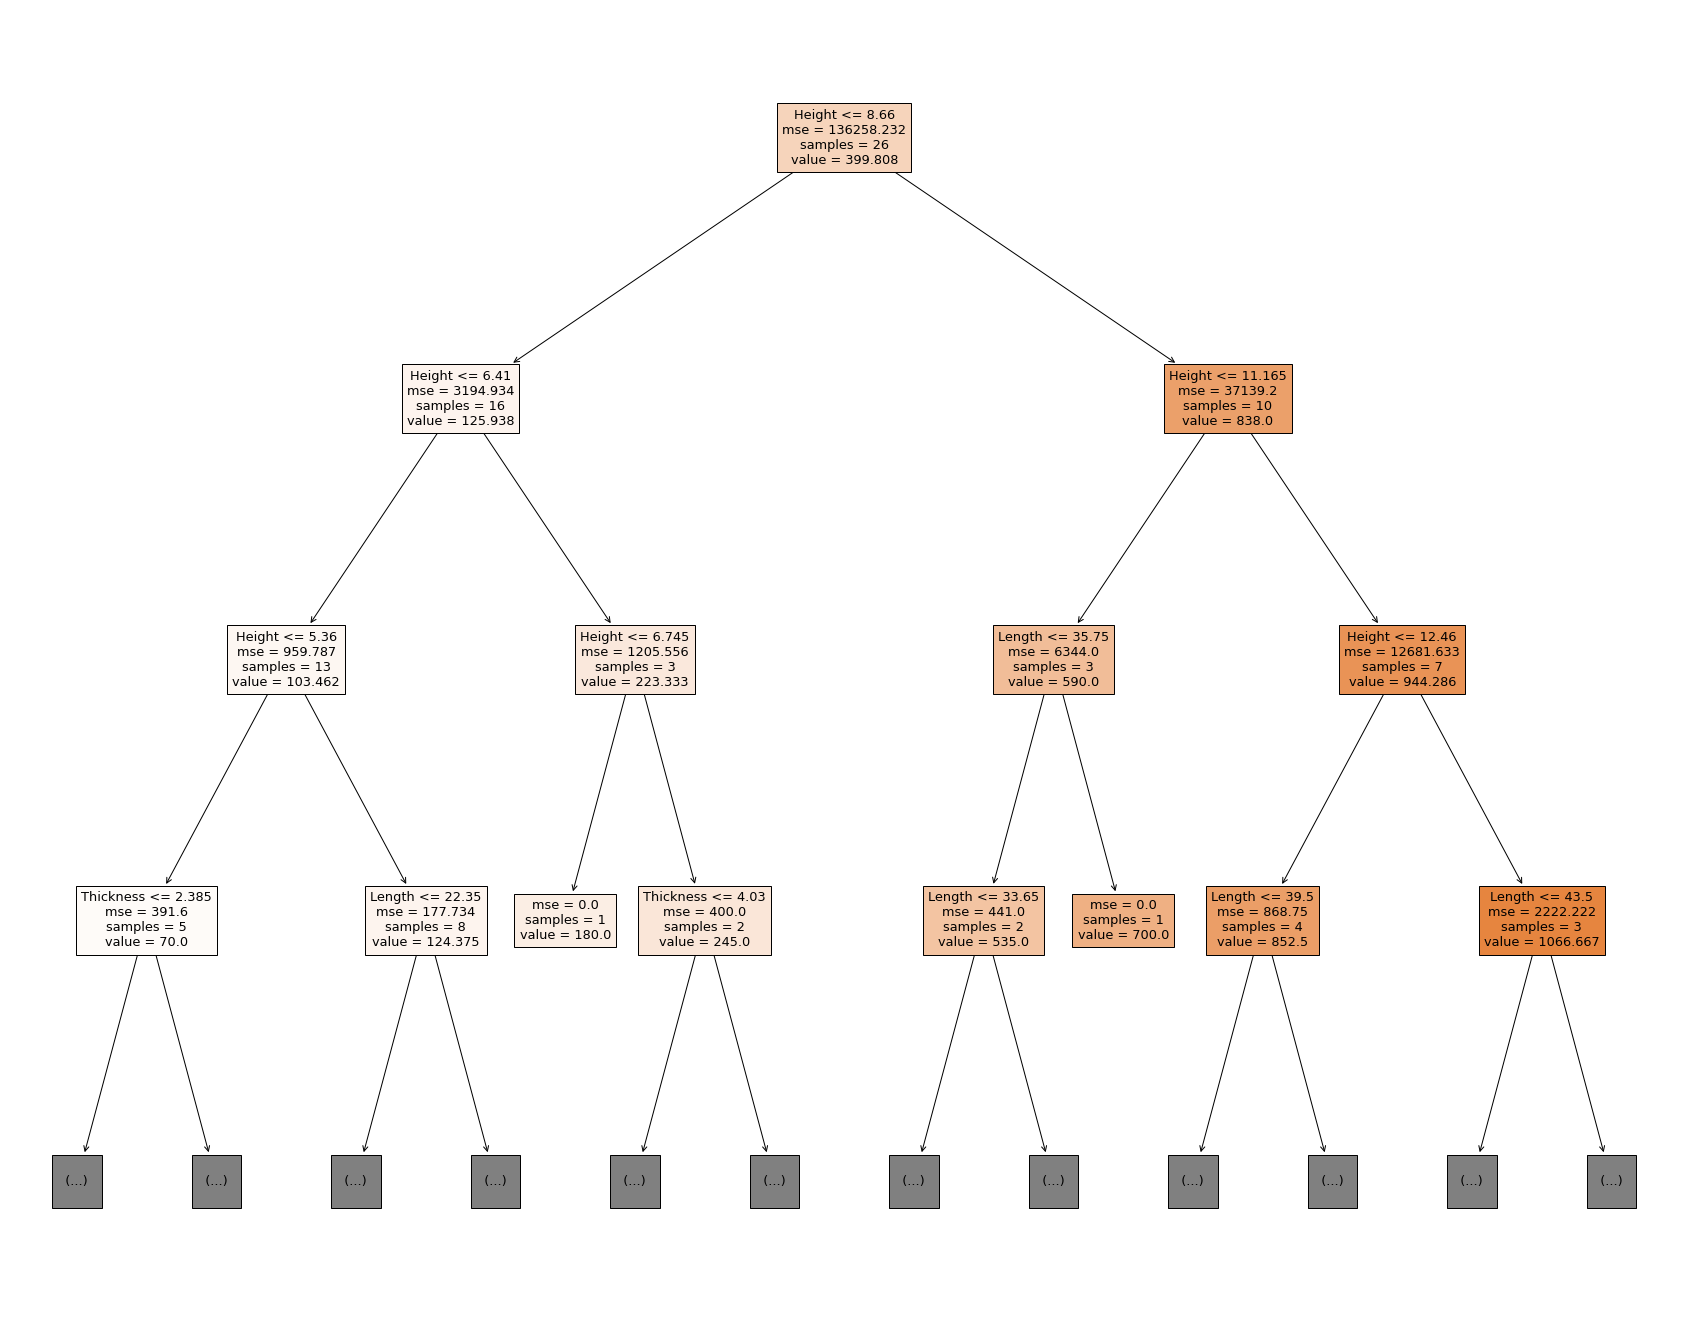

In [ ]:
plt.figure(figsize=(30,24))
plot_tree(dtr, max_depth=3, feature_names=['Length', 'Height', 'Thickness' ], filled=True)
plt.show()

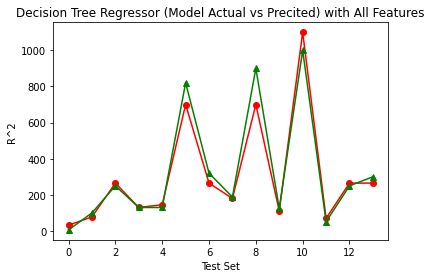

In [ ]:
test_predict = dtr.predict(test_input)
plt.figure()
plt.title("Decision Tree Regressor (Model Actual vs Precited) with All Features")
plt.xlabel('Test Set')
plt.ylabel('R^2')
plt.plot(test_predict, 'o-', color="r", label="Predict")
plt.plot(test_target, '^-', color="g", label="Actual")
plt.show()